# 0. Configure Package Dependencies

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg # supports basic image loading, rescaling and display operations
# make the plot outputs appear and be stored within the notebook 
%matplotlib inline 
import seaborn as sns
sns.set(style='whitegrid', context='notebook', palette='deep')


from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix # confusion matrix to evaluate the accuracy of a classification
import itertools  # Functions creating iterators for efficient looping

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


/kaggle/input/test.csv
/kaggle/input/train.csv
/kaggle/input/sample_submission.csv


# 1. Import the Dataset 

In [2]:
# Read the ".csv" from input folder.
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

# 2. Preview the Dataset 

In [3]:
# Display the dimensions of the dataset.
rows = train.shape[0]
columns = train.shape[1]
print('Total Number of Features: ', columns)
print('Total Number of Instances: ', rows)

Total Number of Features:  785
Total Number of Instances:  42000


In [4]:
# Preview the first 10 instances.
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Display the dimensions and data type of the train data.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
# Return the statistics for all numeric variables.
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# 3. Feature Engineering 

## 3.1 Split training data into X and Y

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

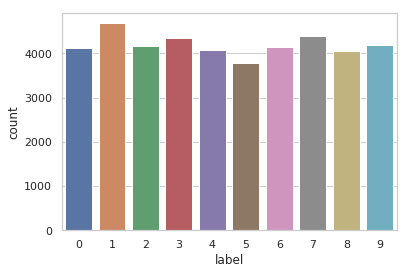

In [7]:
train_Y = train["label"]
train_X = train.drop(labels = ["label"],axis = 1) # Drop 'label' column

del train # free train space

# Show the counts of class labels in each categorical bin using bars.
g = sns.countplot(train_Y)  # a histogram across a label
train_Y.value_counts()  # return each label and its count

## 3.2 Process null and missing values

In [8]:
# whether each column contains at least one True element
train_X.isna().any().describe() 

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
test.isna().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

## 3.3 Normalization 

In [10]:
# Convert [0,255] into [0,1] in grayscale normalization.
train_X = train_X / 255.0
test = test / 255.0 

## 3.4 Reshape

In [11]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1).
train_X = train_X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

## 3.5 Label encoding

In [12]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).
train_Y = to_categorical(train_Y, num_classes = 10)

## 3.6 Split training and valdiation set

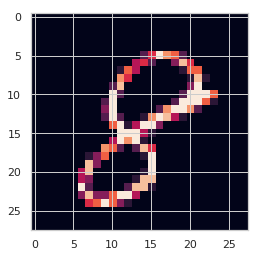

In [13]:
# Set the random seed.
random_seed = 2 

# Split the train and the validation set for the fitting.
X_train, X_val, Y_train, Y_val = train_test_split(train_X, train_Y, test_size = 0.1, random_state=random_seed) 

# Some examples.
g = plt.imshow(X_train[0][:,:,0])

# 4. Define the model 

## 4.1 Set model structure

In [14]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()  # Keras Sequential model

# keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, ...)
# When using this layer as the first layer in a model, provide the keyword argument "input_shape"
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28,28,1)))  # add 2D convolution layer 
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))  # add 2D convolution layer 

# keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)
model.add(MaxPool2D(pool_size=(2,2)))  # add pooling layer 

# keras.layers.Dropout(rate, noise_shape=None, seed=None)
model.add(Dropout(0.25))  # apply dropout to the input


model.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation ='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())  # Flattens the input. Does not affect the batch size.

# keras.layers.Dense(units, activation=None, use_bias=True)
model.add(Dense(256, activation="relu"))  # Just your regular densely-connected NN layer
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax")) 

## 4.2 Set optimizer, loss function and metric

In [15]:
# Define the optimizer
# keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
# This optimizer is usually a good choice for recurrent neural networks
optimizer = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0) 

In [16]:
# Before training a model, you need to configure the learning process, which is done via the compile method. 
# Compile the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

## 4.3 Set annealer

In [17]:
# Set a learning rate annealer. 
# keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=3, verbose=1, min_lr=0.00001) 

In [18]:
# Set parameters for batching.
epochs = 2
batch_size = 86

## 4.4 Data augmentation

In [19]:
# With data augmentation to prevent overfitting (accuracy 0.99286).
# Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train) 

# Trains the model on data generated batch-by-batch by a Python generator (or an instance of Sequence). 
# fit_generator(generator, steps_per_epoch=None, epochs=1, verbose=1, callbacks=None, validation_data=None, validation_steps=None, validation_freq=1, ...)
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size), 
                              epochs=epochs, 
                              validation_data=(X_val,Y_val), 
                              verbose=2, 
                              steps_per_epoch=X_train.shape[0], 
                              callbacks=[reduce_lr]
                             )

Epoch 1/2
 - 744s - loss: 0.1016 - acc: 0.9769 - val_loss: 0.0971 - val_acc: 0.9900
Epoch 2/2
 - 744s - loss: 0.2376 - acc: 0.9659 - val_loss: 0.2024 - val_acc: 0.9857


# 5. Evaluate the model 

## 5.1 Training and validation curves

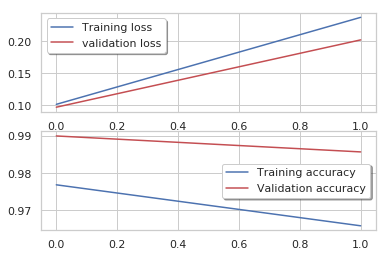

In [20]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## 5.2 Confusion matrix

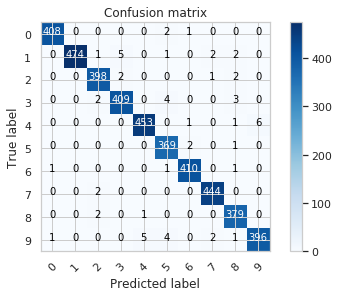

In [21]:
# Look at confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

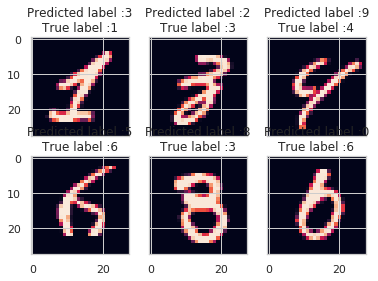

In [22]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

# 6. Predict and submit "submission.csv" file

In [23]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [24]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_keras_mnist.csv",index=False)